# Data Loading and Inspection

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [17]:
# Set a Seaborn style ofr cleaner plots
sns.set_theme(style="whitegrid")

#### 1. Loading and Inspecting Data

In [18]:
df = pd.read_csv("data/netflix_titles.csv")

In [19]:
# basic information 
print("The first five rows:")
df.head()

The first five rows:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [20]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [21]:
print("Missing values per column:")
df.isna().sum()


Missing values per column:


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#### 2. Data Cleaning

In [22]:
for col in df:
    if df[col].isna().sum() > 10:
        df[col] = df[col].fillna("Unknown")


#### 4. Exploratory Data Analysis (EDA)

##### a. Basic Statics:

In [23]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


##### b. Content Type Distribution

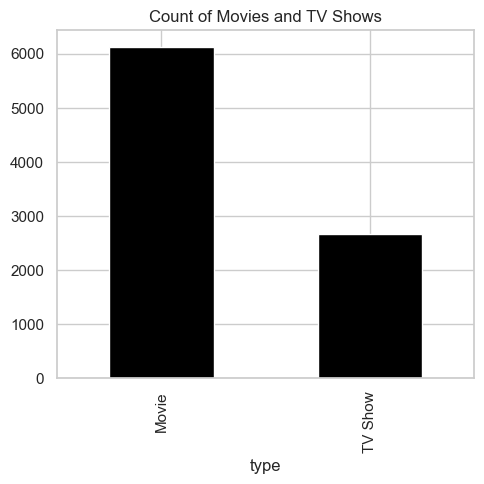

In [42]:
# Count of Movies and TV shows

type_distribution = df['type'].value_counts()

plt.figure(figsize=(5,5))
type_distribution.plot(kind='bar',color='black')
plt.title("Count of Movies and TV Shows")
plt.tight_layout()
plt.show()

##### c. Release Year Trends

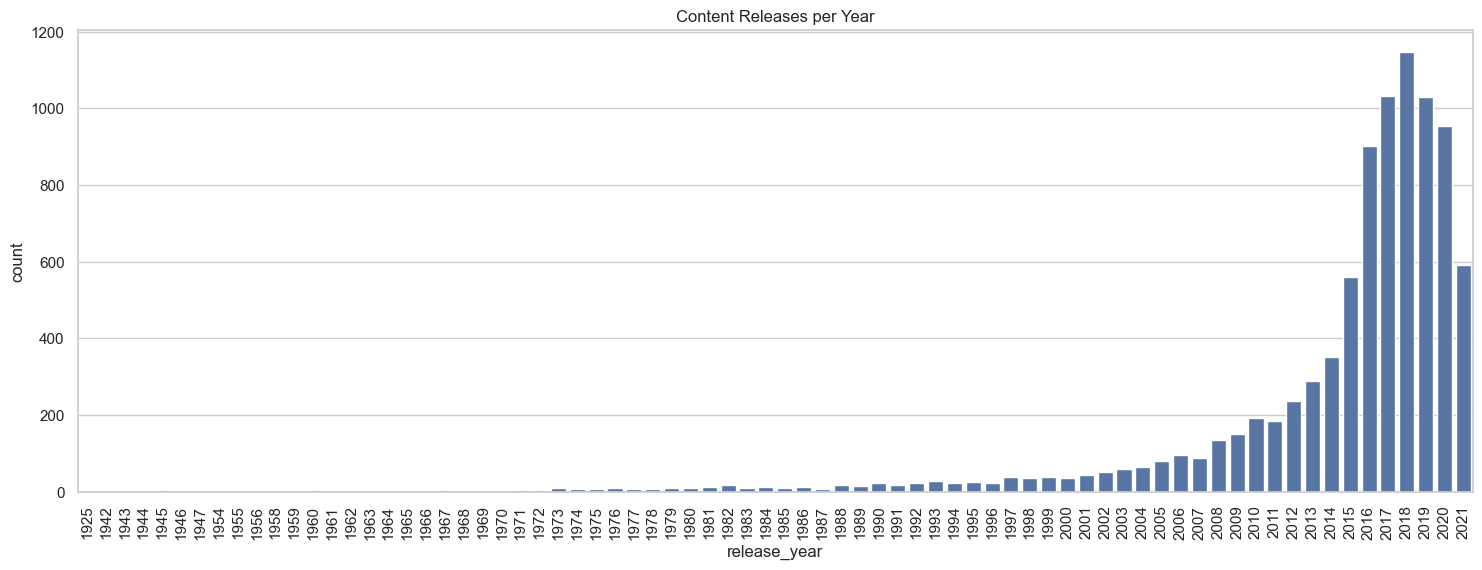

In [52]:
plt.figure(figsize=(18, 6))
sns.countplot(data=df, x='release_year', order=sorted(df['release_year'].dropna().unique()))
plt.xticks(rotation=90)
plt.title("Content Releases per Year")
plt.show()


##### d. Distribution of Ratings

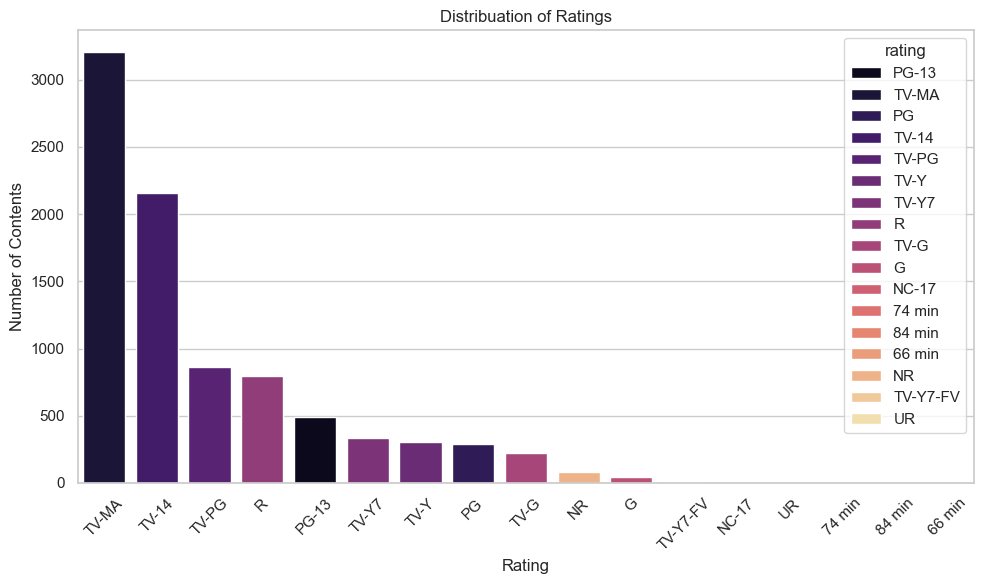

In [62]:
plt.figure(figsize=(10, 6))

rating_order = df['rating'].value_counts().index
sns.countplot(data = df, x='rating',hue='rating',palette ='magma',order=rating_order)
plt.title("Distribuation of Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Contents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### e. Top 10 Contries by Number of Titles

In [63]:
def split_contries(country):
    if pd.isnull(country):
        return[]
    return [c.strip() for c in country.split(',')]

In [81]:
df['country_list'] = df['country'].apply(split_contries)

df_exploded = df.explode("country_list")
top_countires = df_exploded['country_list'].value_counts().head(10)

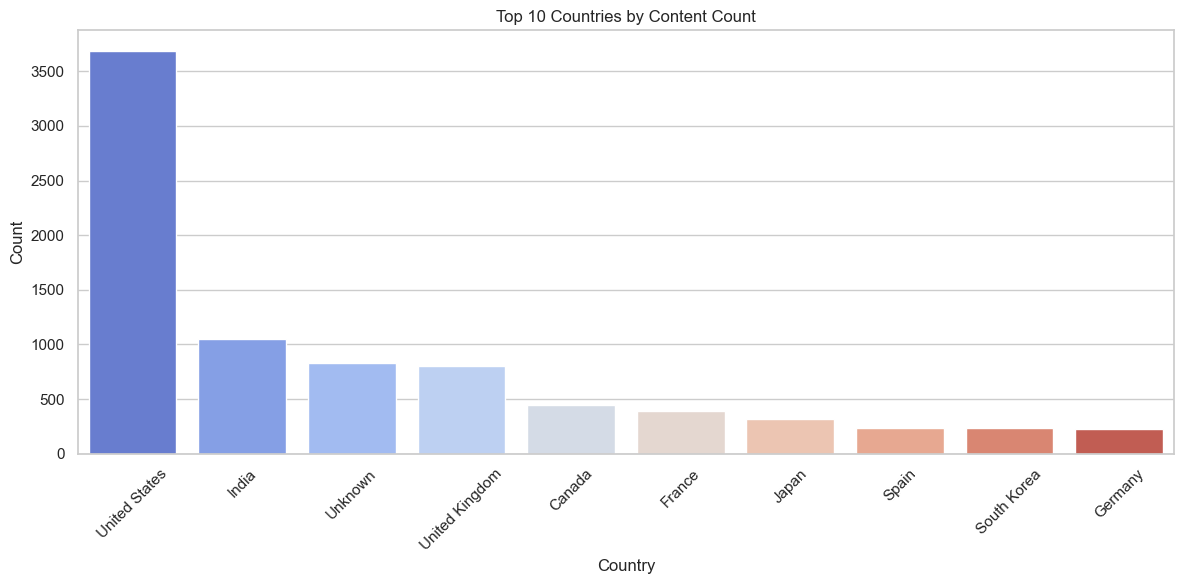

In [92]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_countires.index,y=top_countires.values,hue=top_countires.index,palette='coolwarm')
plt.title("Top 10 Countries by Content Count")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### f. Top 10 Genres on Netflix

In [97]:
def split_genres(genre_str):
    if pd.isnull(genre_str):
        return []
    return [genre.strip() for genre in genre_str.split(',')]

In [98]:
df['genre_list'] = df['listed_in'].apply(split_genres)
df_genres = df.explode("genre_list")
top_genres = df_genres['genre_list'].value_counts().head(10)

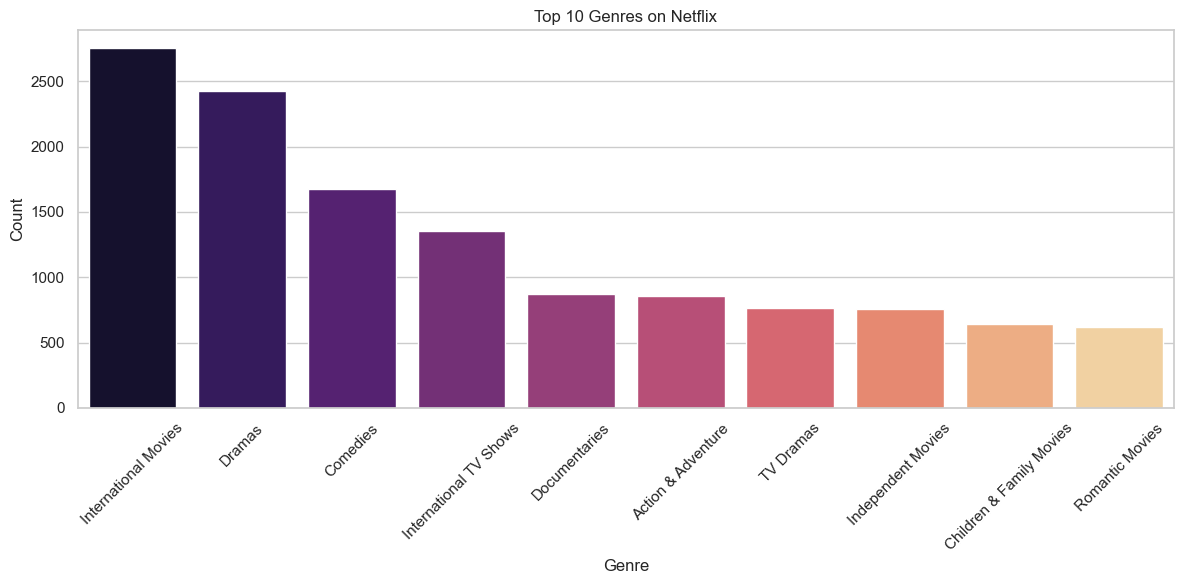

In [101]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_genres.index,y=top_genres.values,hue=top_genres.index,palette='magma')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()